In [1]:
import numpy as np 
import pandas as pd
# Set Pandas display options
#pd.set_option('display.max_rows', None) //Makes the entire dataset visible in case of large dataset
#pd.set_option('display.max_columns', None)
# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def warns(*args,**kwargs): pass
warnings.warn=warns

In [2]:
df = pd.read_csv('raw_titles.csv')
print('Data Shape: ', df.shape)
df.sample(15)

Data Shape:  (5806, 13)


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5170,5170,tm1003353,Operation Varsity Blues: The College Admission...,MOVIE,2021,R,100,"['drama', 'documentation', 'crime']",['US'],NaN,tt14111734,6.9,7993.0
2009,2009,ts79234,The Boss Baby: Back in Business,SHOW,2018,TV-G,23,"['action', 'comedy', 'animation', 'family', 'f...",['US'],4.0,tt7741824,6.4,3595.0
239,239,tm42397,Hello Brother,MOVIE,1999,NaN,131,"['romance', 'action', 'comedy', 'fantasy']",['IN'],NaN,tt0233856,4.6,4230.0
3796,3796,tm494731,Sextuplets,MOVIE,2019,NaN,97,['comedy'],['US'],NaN,tt8976710,4.4,8380.0
455,455,ts1464,The Cartel,SHOW,2008,TV-MA,44,"['action', 'crime', 'drama', 'thriller', 'come...",['CO'],2.0,tt1260520,8.1,755.0
3719,3719,ts268508,Alien Worlds,SHOW,2020,TV-PG,44,"['documentation', 'animation', 'scifi']",['GB'],1.0,tt13464340,6.5,3509.0
3805,3805,ts189629,"Nisman. The Prosecutor, the President and the Spy",SHOW,2019,NaN,62,"['thriller', 'documentation', 'crime', 'history']",['AR'],1.0,tt11618264,7.6,569.0
4281,4281,tm675171,The Black Godfather,MOVIE,2019,NaN,118,"['documentation', 'music']",['US'],NaN,tt10289996,7.4,1341.0
2474,2474,tm282910,Fireworks,MOVIE,2017,PG-13,90,"['drama', 'documentation', 'fantasy', 'romance...",['JP'],NaN,tt6317962,5.6,3147.0
2051,2051,tm244307,Bright,MOVIE,2017,R,117,"['thriller', 'fantasy', 'action', 'crime', 'sc...",['US'],NaN,tt5519340,6.3,183841.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5806 non-null   int64  
 1   id                    5806 non-null   object 
 2   title                 5805 non-null   object 
 3   type                  5806 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 589.8+ KB


In [4]:
df.isnull().sum()

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

             Column Name  Null Percentage
0                seasons        64.743369
1      age_certification        44.953496
2             imdb_votes         9.283500
3             imdb_score         9.007923
4                imdb_id         7.647261
5                  title         0.017224
6                  index         0.000000
7                     id         0.000000
8                   type         0.000000
9           release_year         0.000000
10               runtime         0.000000
11                genres         0.000000
12  production_countries         0.000000


In [7]:
columns_to_impute = ['title', 'age_certification', 'seasons','imdb_id','imdb_score','imdb_votes']
for column in columns_to_impute:
    df[column].fillna("Unknown", inplace=True)

In [8]:
df.sample(15)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
4783,4783,ts215869,Extreme Engagement,SHOW,2019,Unknown,40,['reality'],[],1.0,tt10521644,5.6,382.0
4053,4053,ts223690,Yanxi Palace: Princess Adventures,SHOW,2019,Unknown,45,['drama'],['CN'],1.0,Unknown,Unknown,Unknown
3544,3544,tm315348,Triple Threat,MOVIE,2019,R,96,"['thriller', 'action']","['US', 'CN', 'TH']",Unknown,tt6644602,5.6,11115.0
4240,4240,tm838705,Holiday Rush,MOVIE,2019,Unknown,94,"['comedy', 'drama', 'romance', 'family']",['US'],Unknown,tt10091530,4.9,2705.0
4150,4150,ts217356,Betaal,SHOW,2020,TV-MA,47,"['action', 'horror', 'thriller']",['IN'],1.0,tt10651790,5.4,8884.0
3060,3060,tm411649,Thug Life,MOVIE,2017,Unknown,134,"['comedy', 'drama']",['IN'],Unknown,tt9537072,5.7,48.0
2551,2551,ts76159,Super Monsters,SHOW,2017,TV-Y,12,"['animation', 'comedy', 'family', 'horror']",['CA'],3.0,tt6214876,6.3,411.0
5093,5093,ts296825,Gone for Good,SHOW,2021,TV-MA,49,"['drama', 'crime', 'thriller']",['FR'],1.0,tt14252964,6.3,3863.0
1751,1751,tm236705,Ricardo O'Farrill: Abrazo Genial,MOVIE,2016,Unknown,92,['comedy'],['MX'],Unknown,tt5547496,5.5,113.0
5051,5051,tm981945,The Last Letter From Your Lover,MOVIE,2021,Unknown,110,"['romance', 'drama']","['GB', 'CA']",Unknown,tt1893273,6.6,16302.0


In [9]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
str_col = df.select_dtypes(include=('object')).columns
for col in str_col:
    df[col] = labelencoder.fit_transform(df[col].astype('str'))

In [11]:
df

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,4649,1646,1,1945,7,48,624,437,0,0,81,3831
1,1,3136,4365,0,1976,4,113,533,437,23,22,68,3455
2,2,500,3067,0,1975,2,91,416,206,23,19,67,2804
3,3,2836,2655,0,1979,4,94,473,206,23,24,65,2271
4,4,933,4611,0,1973,4,133,1116,437,23,17,66,2267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,37,1628,0,2021,11,100,1200,303,23,1754,54,2256
5802,5802,307,1443,0,2021,11,74,1122,448,23,0,81,3831
5803,5803,150,1027,0,2021,11,88,945,300,23,1956,50,1929
5804,5804,278,4017,0,2021,11,116,171,448,23,553,47,3661


In [12]:
copied_df = df.copy()
copied_df

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,4649,1646,1,1945,7,48,624,437,0,0,81,3831
1,1,3136,4365,0,1976,4,113,533,437,23,22,68,3455
2,2,500,3067,0,1975,2,91,416,206,23,19,67,2804
3,3,2836,2655,0,1979,4,94,473,206,23,24,65,2271
4,4,933,4611,0,1973,4,133,1116,437,23,17,66,2267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,37,1628,0,2021,11,100,1200,303,23,1754,54,2256
5802,5802,307,1443,0,2021,11,74,1122,448,23,0,81,3831
5803,5803,150,1027,0,2021,11,88,945,300,23,1956,50,1929
5804,5804,278,4017,0,2021,11,116,171,448,23,553,47,3661


In [13]:
X = copied_df.drop(['type'], axis='columns')
y = df[['type']]
X
y

,type
0,1
1,0
2,0
3,0
4,0
...,...
5801,0
5802,0
5803,0
5804,0


In [14]:
X

,index,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,4649,1646,1945,7,48,624,437,0,0,81,3831
1,1,3136,4365,1976,4,113,533,437,23,22,68,3455
2,2,500,3067,1975,2,91,416,206,23,19,67,2804
3,3,2836,2655,1979,4,94,473,206,23,24,65,2271
4,4,933,4611,1973,4,133,1116,437,23,17,66,2267
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,37,1628,2021,11,100,1200,303,23,1754,54,2256
5802,5802,307,1443,2021,11,74,1122,448,23,0,81,3831
5803,5803,150,1027,2021,11,88,945,300,23,1956,50,1929
5804,5804,278,4017,2021,11,116,171,448,23,553,47,3661


In [15]:
y

,type
0,1
1,0
2,0
3,0
4,0
...,...
5801,0
5802,0
5803,0
5804,0


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# DECISION TREE

In [17]:
# Import Library for Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
dt_pipeline = make_pipeline( StandardScaler(), DecisionTreeClassifier( criterion = "entropy", random_state = 2, max_depth = 5) )
dt_pipeline.fit(X_train, y_train) # Fit Dataset in Model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=2))])

Accuracy on Training Data: 100.00%
Precision on Training Data (Macro average): 100.00%
Recall on Training Data (Macro average): 100.00%
F1 score on Training Data (Macro average): 100.00%


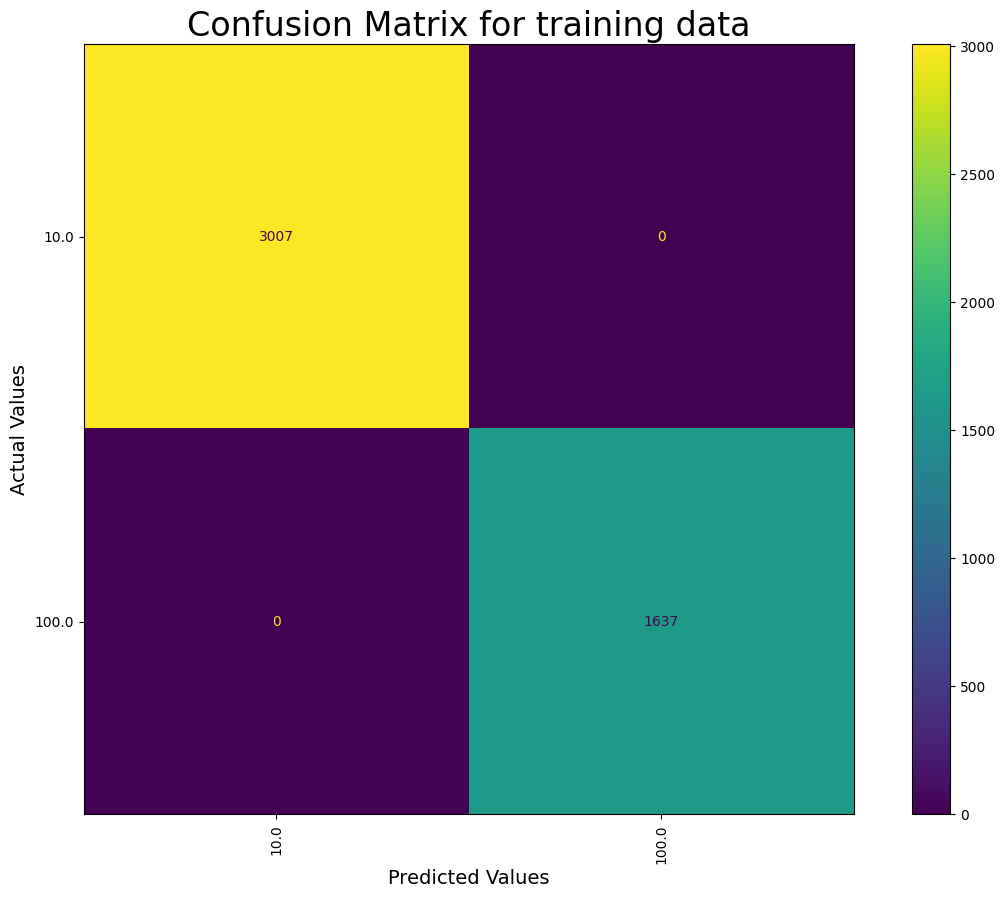

In [19]:
# Accuray On Training Data
decision_predict_train = dt_pipeline.predict(X_train)
decision_accuracy_train = accuracy_score(y_train, decision_predict_train)
print(f"Accuracy on Training Data: {decision_accuracy_train * 100:.2f}%")
# Precision on Training Data
print(f"Precision on Training Data (Macro average): {precision_score(y_train, decision_predict_train, average='macro') * 100:.2f}%")
#Recall on training data
print(f"Recall on Training Data (Macro average): {recall_score( y_train, decision_predict_train, average = 'macro') * 100:.2f}%")
# F1 score on training data
print(f"F1 score on Training Data (Macro average): {f1_score( y_train, decision_predict_train, average = 'macro') * 100:.2f}%")

# View Confusion Matrix
cm = confusion_matrix(y_train, decision_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in dt_pipeline.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 100.00%
Precision on Test Data (Macro Average): 100.00 %
Recall on Test Data (Macro Average): 100.00 %
F1 score on Test Data (Macro Average): 100.00 %


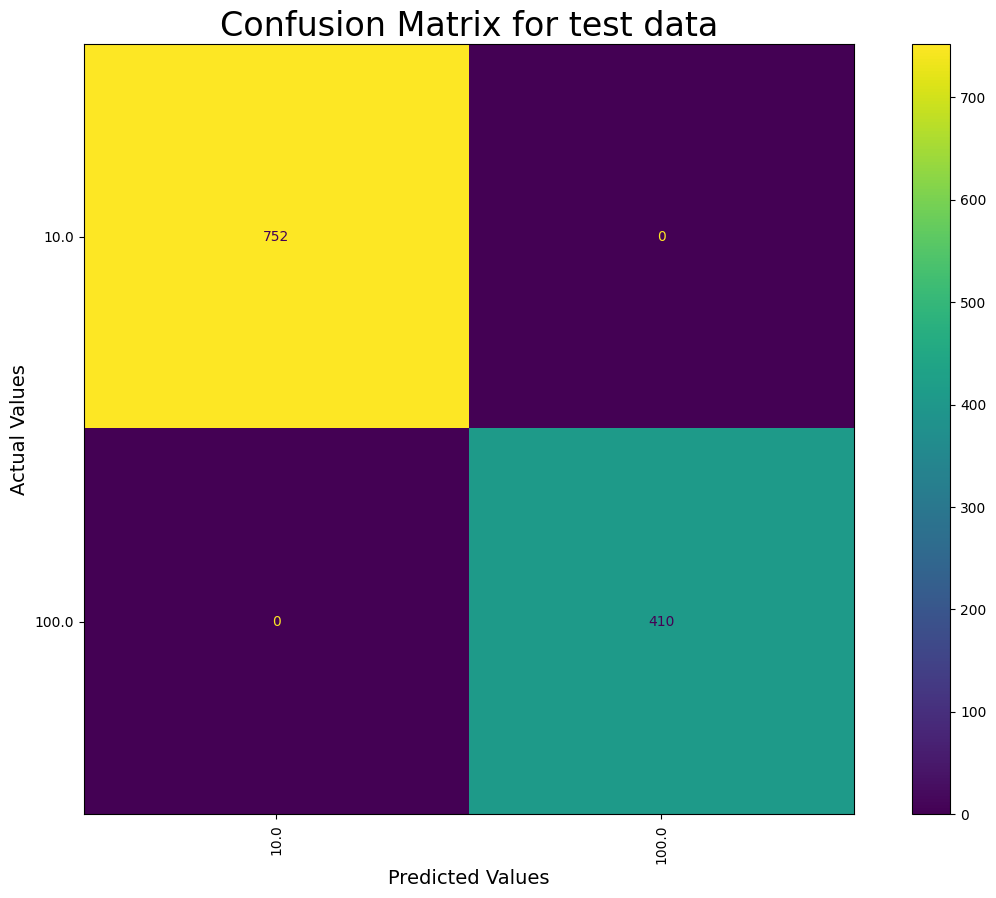

In [20]:
# Accuray On Test Data
decision_predict_test = dt_pipeline.predict(X_test)
decision_accuracy_test = accuracy_score(y_test, decision_predict_test)
print(f"Accuracy on Test Data: {decision_accuracy_test * 100:.2f}%")

# Precision on Test Data
decision_precision = precision_score(y_test, decision_predict_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(decision_precision * 100))

# Recall on Test data
decision_recall = recall_score(y_test, decision_predict_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(decision_recall * 100))

# F1 score on Test data
decision_f1 = f1_score(y_test, decision_predict_test, average='macro')
print("F1 score on Test Data (Macro Average): {:.2f} %".format(decision_f1 * 100))

# View Confusion Matrix
cm = confusion_matrix(y_test, decision_predict_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in dt_pipeline.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for test data", fontsize=24)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=0 )

# Fit Dataset in Model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
# Prediction of Train and Test Dataset
random_predict_train = rf.predict(X_train)
random_predict_test = rf.predict(X_test)

Accuracy on Training Data : 100.00 %
Precision on Training Data (Macro average): 100.00 %
Recall on Training Data (Macro average): 100.00 %
F1 score on Training Data (Macro average): 100.00%


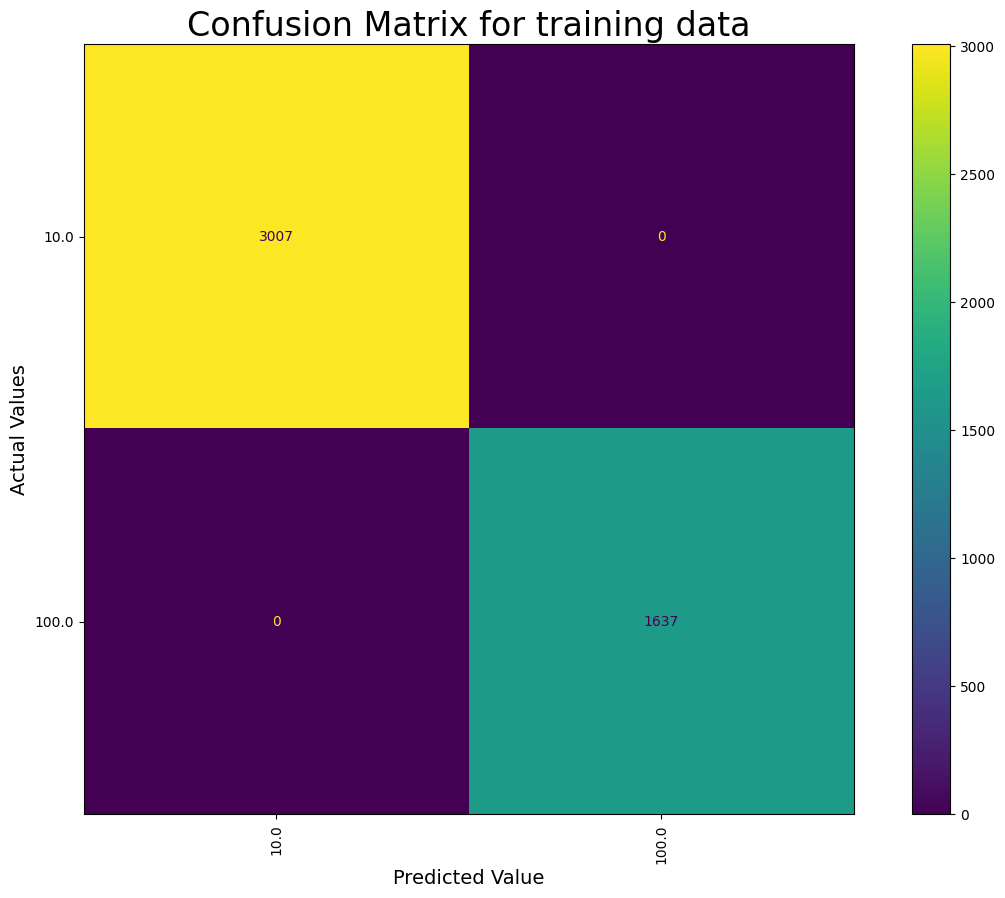

In [24]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, random_predict_train) * 100) )
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, random_predict_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, random_predict_train, average = "macro") * 100) )
print(f"F1 score on Training Data (Macro average): {f1_score( y_train, random_predict_train, average = 'macro') * 100:.2f}%")
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, random_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in rf.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 100.00 %
Precision on Test Data (Macro Average): 100.00 %
Recall on Test Data (Macro Average): 100.00 %
F1 score on Test Data (Macro Average): 100.00 %


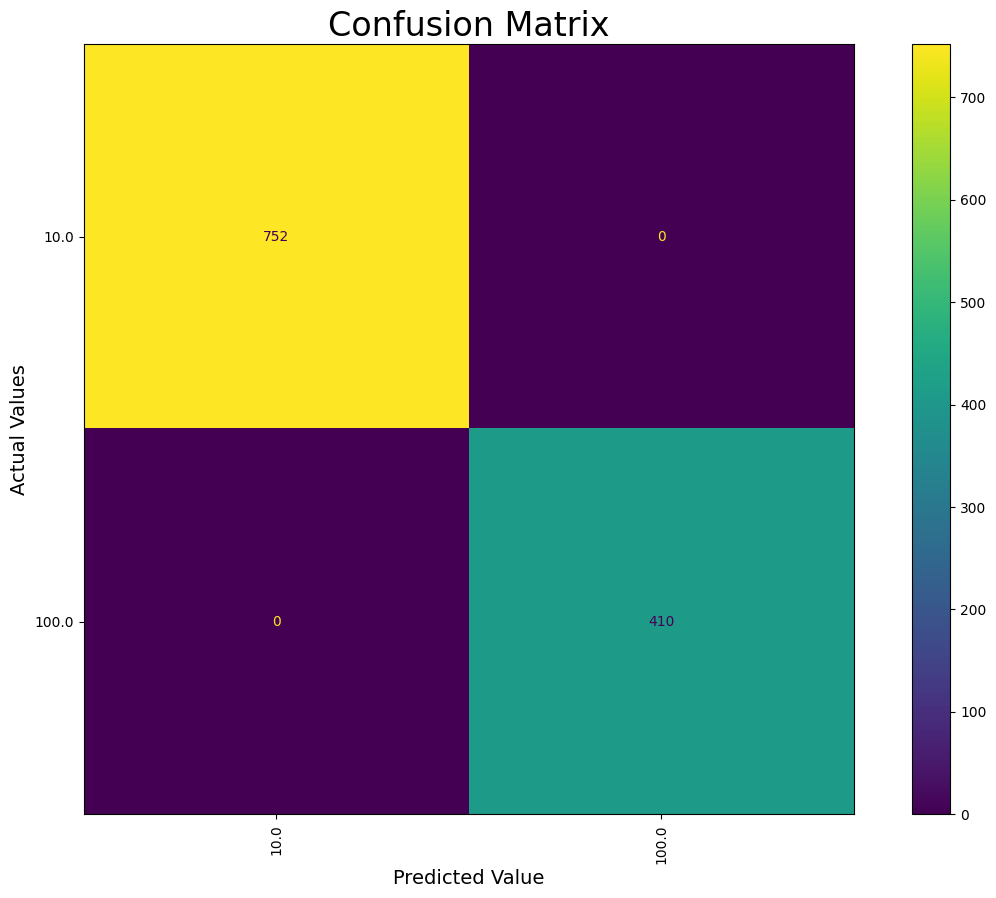

In [25]:
# Accuracy of Testing Dataset
random_accuracy = accuracy_score(y_test, random_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(random_accuracy * 100))

# Precision on Testing Dataset
random_precision = precision_score(y_test, random_predict_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(random_precision * 100))

# Recall on Testing Dataset
random_recall = recall_score(y_test, random_predict_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(random_recall * 100))

# F1 score
random_f1 = f1_score(y_test, random_predict_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(random_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test,random_predict_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in rf.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train) #Fit the dataset into the model for training

LogisticRegression()

In [27]:
logistic_predict_train = clf.predict(X_train)
logistic_predict_test = clf.predict(X_test)

Accuracy on Training Data : 100.00 %
Precision on Training Data (Macro average): 100.00 %
Recall on Training Data (Macro average): 100.00 %
F1 score on Training Data (Macro average): 100.00 %


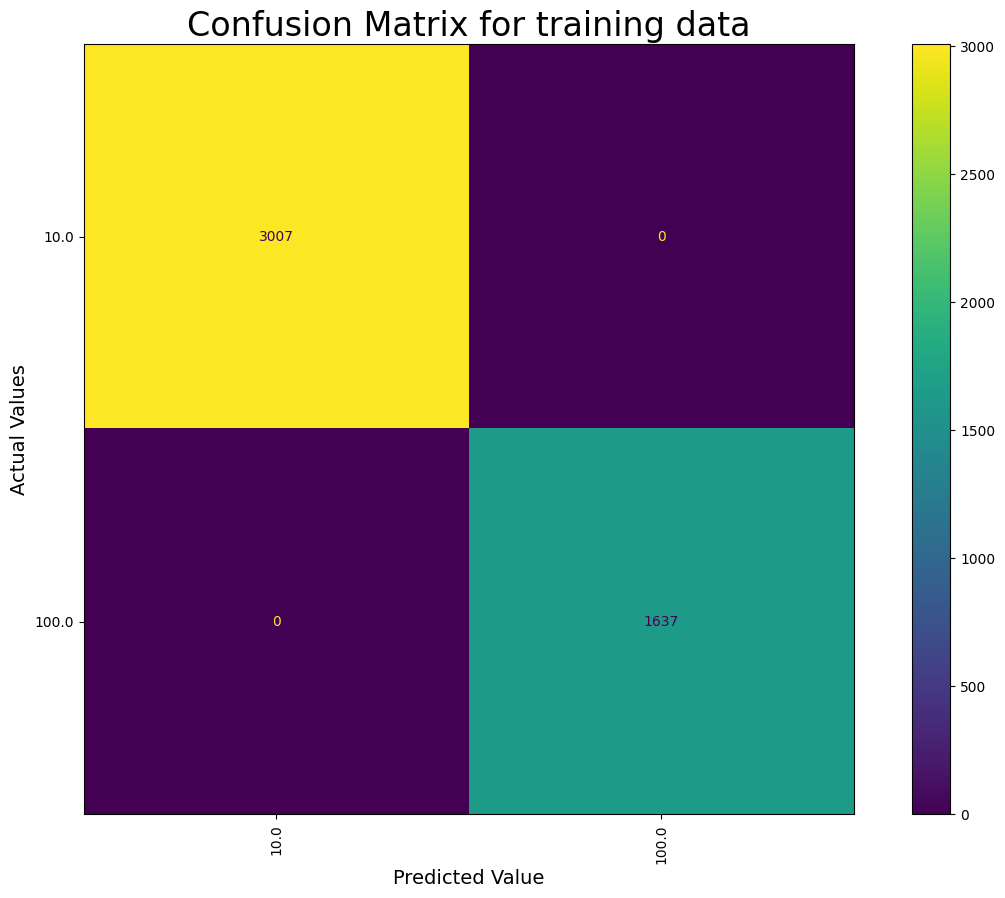

In [28]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, logistic_predict_train) * 100) )
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, logistic_predict_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, logistic_predict_train, average = "macro") * 100))
print("F1 score on Training Data (Macro average): {:.2f} %".format(f1_score(y_train,logistic_predict_train,average = "macro")*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, logistic_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in clf.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.91 %
Precision on Test Data (Macro Average): 99.93 %
Recall on Test Data (Macro Average): 99.88 %
F1 score on Test Data (Macro Average): 99.91 %


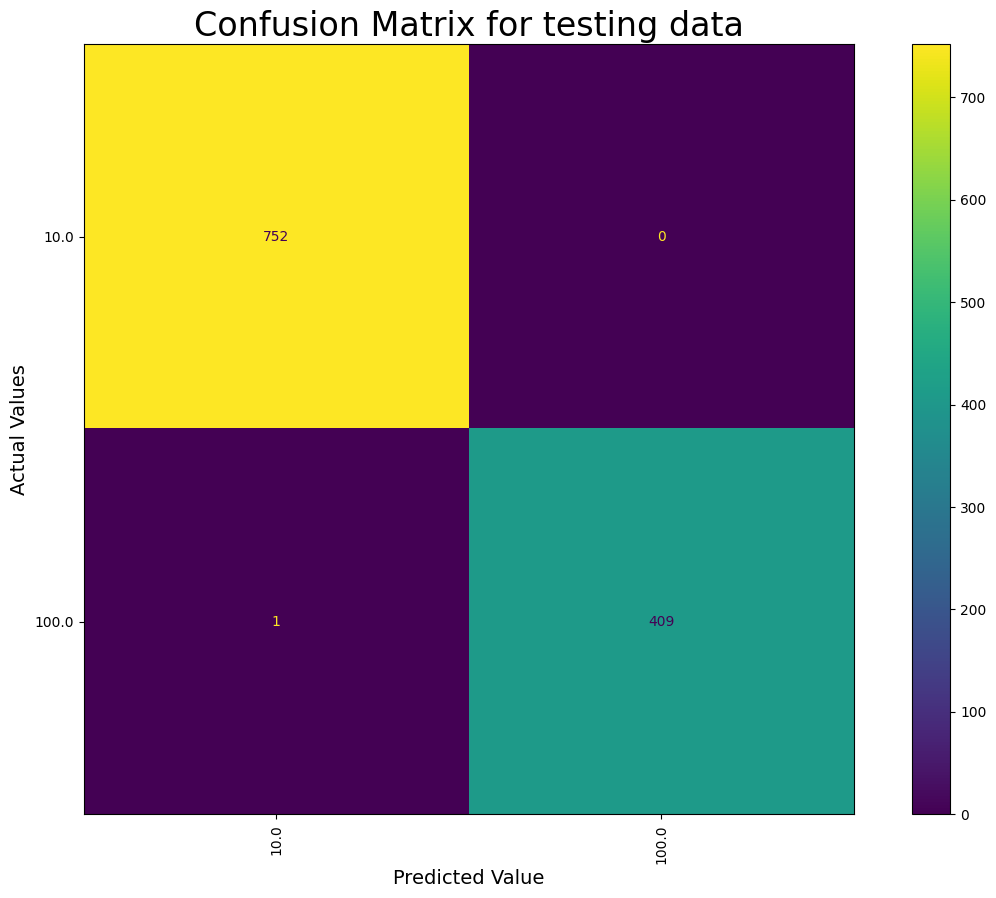

In [29]:
# Accuracy of Testing Dataset
softmax_accuracy = accuracy_score(y_test, logistic_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(softmax_accuracy * 100))

# Precision on Testing Dataset
softmax_precision = precision_score(y_test, logistic_predict_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(softmax_precision * 100))

# Recall on Testing Dataset
softmax_recall = recall_score(y_test, logistic_predict_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(softmax_recall * 100))

# F1 score
softmax_f1 = f1_score(y_test, logistic_predict_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(softmax_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, logistic_predict_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in clf.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# SUPPORT VECTOR MACHINE

In [30]:
from sklearn.svm import SVC

In [31]:
support_vector_classifier = SVC()
support_vector_classifier.fit(X_train, y_train)

SVC()

In [32]:
svm_predict_train = support_vector_classifier.predict(X_train)
svm_predict_test = support_vector_classifier.predict(X_test)

Accuracy on Training Data : 99.35 %
Precision on Training Data (Macro average): 99.20 %
Recall on Training Data (Macro average): 99.39 %
F1 score on Training Data (Macro average): 99.29 %


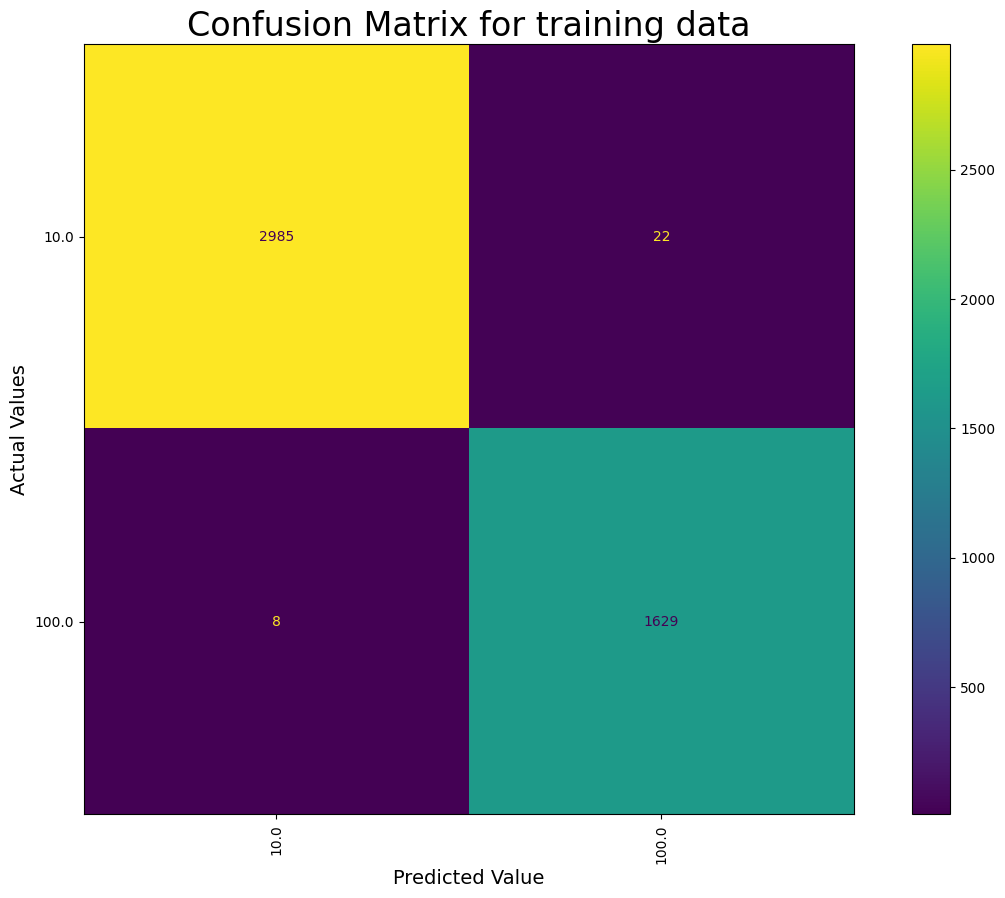

In [33]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, svm_predict_train) * 100) )
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, svm_predict_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, svm_predict_train, average = "macro") * 100) )
print("F1 score on Training Data (Macro average): {:.2f} %".format(f1_score(y_train,svm_predict_train,average = "macro")*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, svm_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in support_vector_classifier.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 99.05 %
Precision on Test Data (Macro Average): 98.79 %
Recall on Test Data (Macro Average): 99.16 %
F1 score on Test Data (Macro Average): 98.97 %


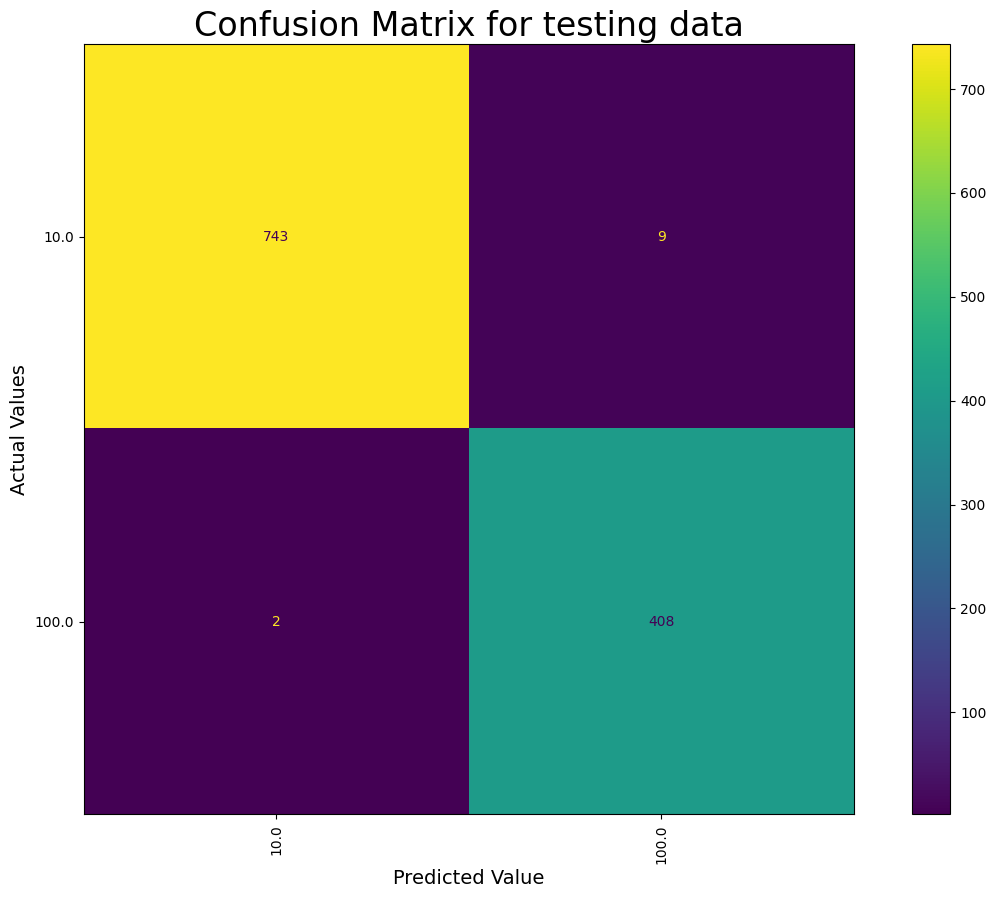

In [34]:
# Accuracy on Test Data
svm_accuracy = accuracy_score(y_test, svm_predict_test)
print("Accuracy on Test Data: {:.2f} %".format(svm_accuracy * 100))

# Precision on Testing Dataset
svm_precision = precision_score(y_test, svm_predict_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(svm_precision * 100))

# Recall on Testing Dataset
svm_recall = recall_score(y_test, svm_predict_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(svm_recall * 100))

# F1 score
svm_f1 = f1_score(y_test, svm_predict_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(svm_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, svm_predict_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in support_vector_classifier.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# K-NEAREST NEIGHBOUR

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3) # K = 3
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_train = knn_classifier.predict(X_train)
knn_test = knn_classifier.predict(X_test)

Accuracy on Training Data : 99.31 %
Precision on Training Data (Macro average): 99.26 %
Recall on Training Data (Macro average): 99.23 %
F1 score on Training Data (Macro average): 99.25 %


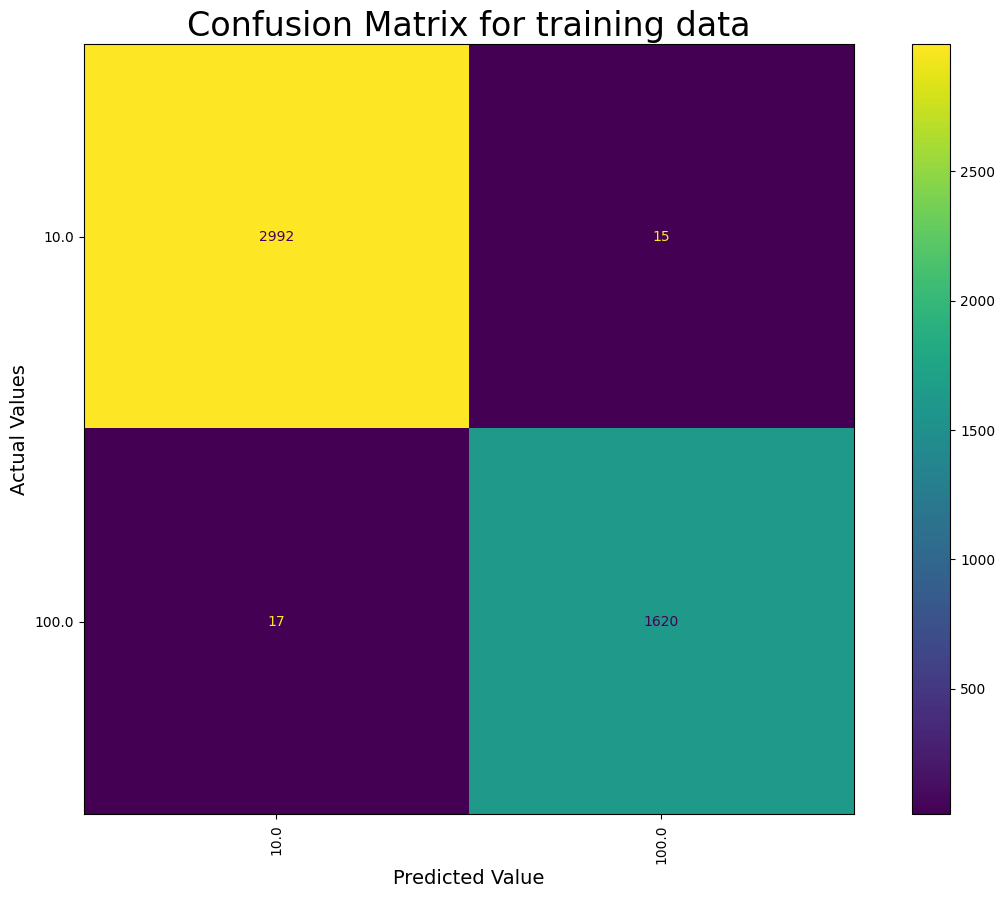

In [38]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, knn_train) * 100) )
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, knn_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, knn_train, average = "macro") * 100) )
print("F1 score on Training Data (Macro average): {:.2f} %".format(f1_score(y_train,knn_train,average = "macro")*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, knn_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in knn_classifier.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


Accuracy on Test Data: 98.19 %
Precision on Test Data (Macro Average): 97.76 %
Recall on Test Data (Macro Average): 98.33 %
F1 score on Test Data (Macro Average): 98.03 %


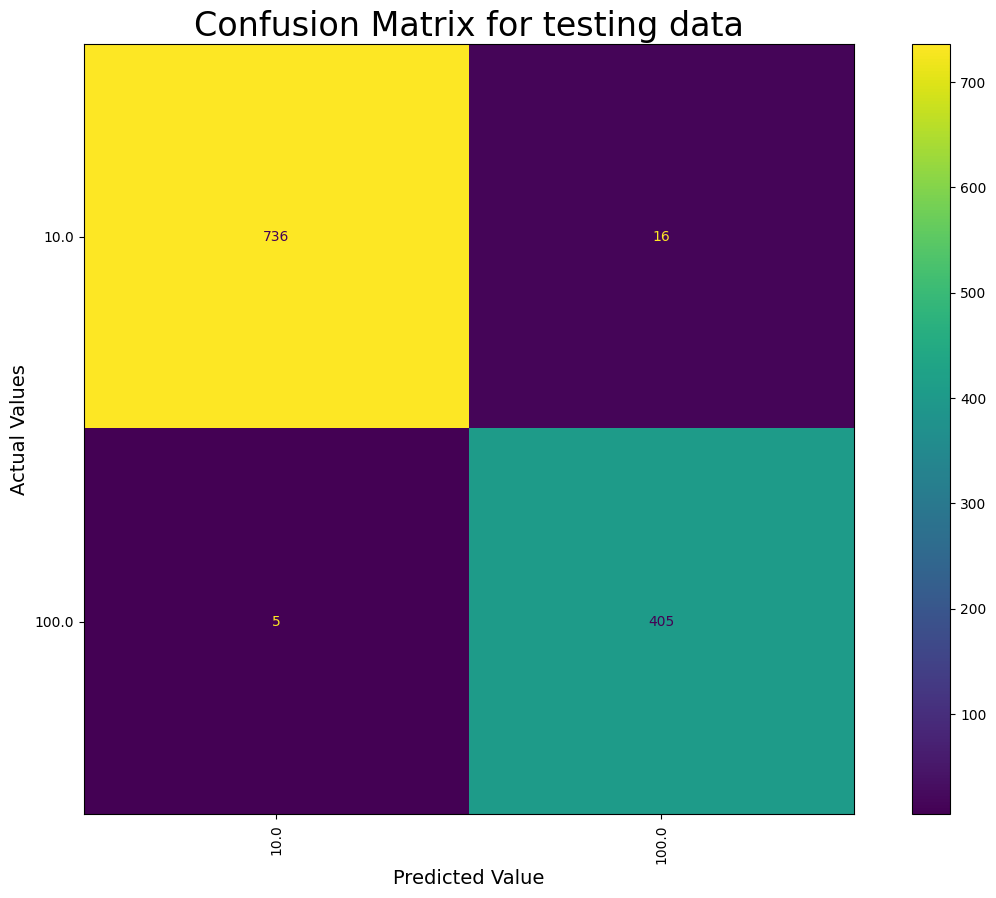

In [39]:
# Accuracy on Test Data
knn_accuracy = accuracy_score(y_test, knn_test)
print("Accuracy on Test Data: {:.2f} %".format(knn_accuracy * 100))

# Precision on Testing Dataset
knn_precision = precision_score(y_test, knn_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(knn_precision * 100))

# Recall on Testing Dataset
knn_recall = recall_score(y_test, knn_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(knn_recall * 100))

# F1 score
knn_f1 = f1_score(y_test, knn_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(knn_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, knn_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in knn_classifier.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# XGBoost

In [40]:
# Import Library
import xgboost
from xgboost import XGBClassifier

xgb_pipeline = make_pipeline( StandardScaler(), XGBClassifier(random_state = 18) )
xgb_pipeline.fit(X_train, y_train) # Fit Data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=18, ...))])

Accuracy on Train Data: 100.0%
Precision on Training Data (Macro average): 100.00 %
Recall on Training Data (Macro average): 100.00 %
F1 score on Training Data (Macro average): 100.00 %


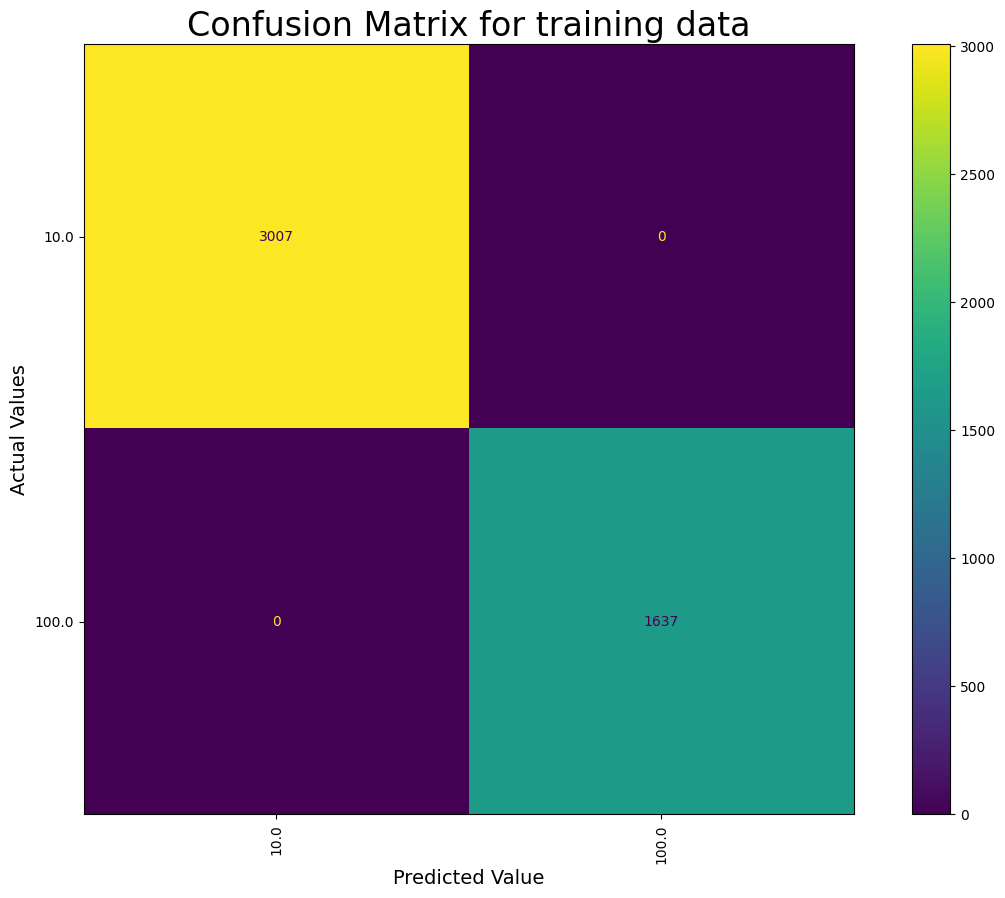

In [41]:
# Accuray On Test Data
xgb_predict_train = xgb_pipeline.predict(X_train)
xgb_accuracy_train = accuracy_score( y_train, xgb_predict_train )
print(f"Accuracy on Train Data: {xgb_accuracy_train * 100}%")
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, xgb_predict_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, xgb_predict_train, average = "macro") * 100) )
print("F1 score on Training Data (Macro average): {:.2f} %".format(f1_score(y_train,xgb_predict_train, average = "macro")*100))

# Visualising Confusion Matrix
cm = confusion_matrix(y_train, xgb_predict_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in xgb_pipeline.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 100.00 %
Precision on Test Data (Macro Average): 100.00 %
Recall on Test Data (Macro Average): 100.00 %
F1 score on Test Data (Macro Average): 100.00 %


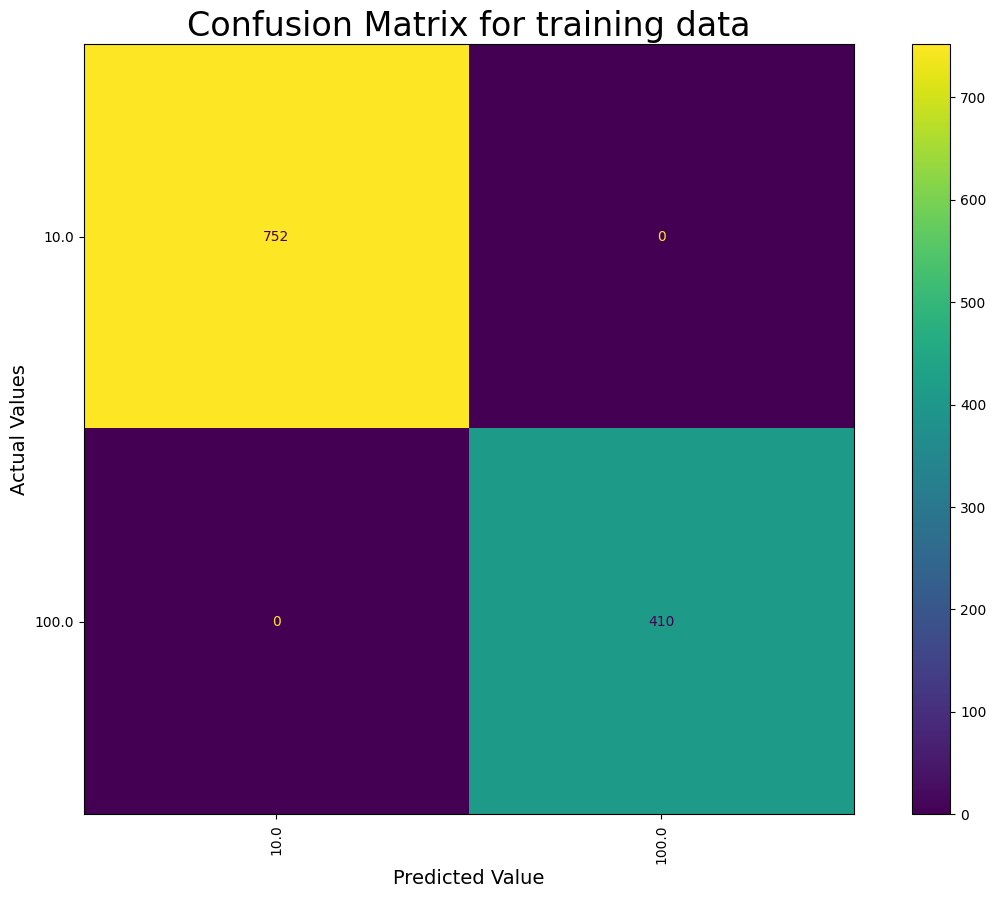

In [42]:
# Accuray On Test Data
xgb_predict_test = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict_test)

print("Accuracy on Test Data: {:.2f} %".format(xgb_accuracy * 100))

# Precision on Testing Dataset
xgb_precision = precision_score(y_test, xgb_predict_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(xgb_precision * 100))

# Recall on Testing Dataset
xgb_recall = recall_score(y_test, xgb_predict_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(xgb_recall * 100))

# F1 score
xgb_f1 = f1_score(y_test, xgb_predict_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(xgb_f1 * 100))


# Visualising Confusion Matrix
cm = confusion_matrix(y_test, xgb_predict_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in xgb_pipeline.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()


# NAIVE BAYES

In [43]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [44]:
gnb_train = gnb.predict(X_train)
gnb_test = gnb.predict(X_test)

Accuracy on Training Data : 100.00 %
Precision on Training Data (Macro average): 100.00 %
Recall on Training Data (Macro average): 100.00 %
F1 score on Training Data (Macro average): 100.00 %


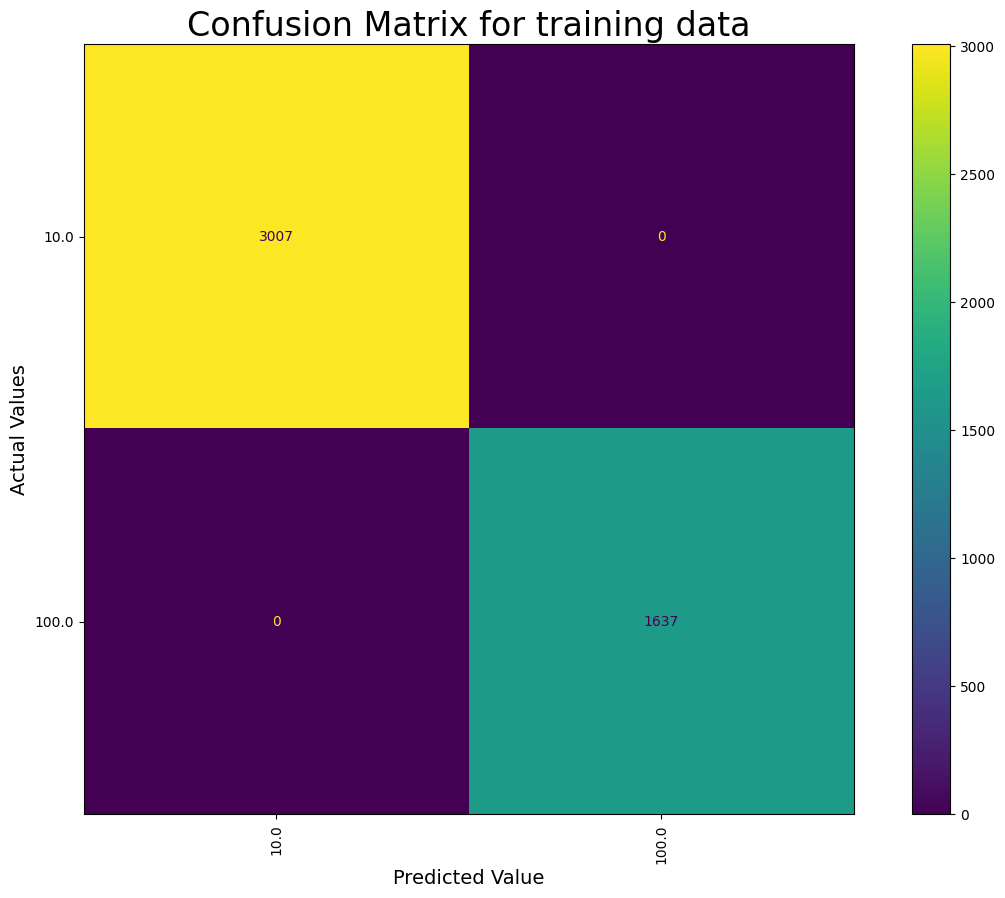

In [45]:
# Accuracy of Training Data
print("Accuracy on Training Data : {:.2f} %".format(accuracy_score( y_train, gnb_train) * 100) )
print("Precision on Training Data (Macro average): {:.2f} %".format(precision_score( y_train, gnb_train, average = "macro") * 100) )
print("Recall on Training Data (Macro average): {:.2f} %".format(recall_score( y_train, gnb_train, average = "macro") * 100) )
print("F1 score on Training Data (Macro average): {:.2f} %".format(f1_score(y_train,gnb_train, average = "macro")*100))
# Visualising Confusion Matrix
cm = confusion_matrix(y_train, gnb_train)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in gnb.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for training data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Accuracy on Test Data: 100.00 %
Precision on Test Data (Macro Average): 100.00 %
Recall on Test Data (Macro Average): 100.00 %
F1 score on Test Data (Macro Average): 100.00 %


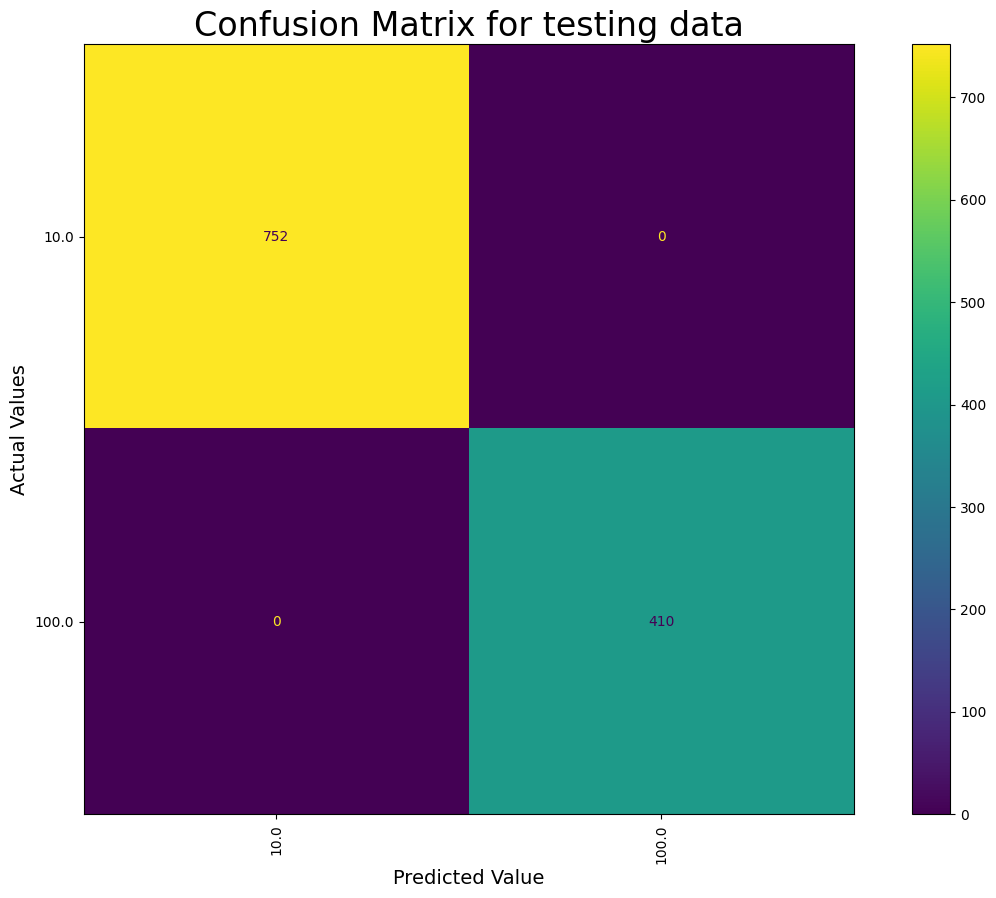

In [46]:
# Accuracy on Test Data
gnb_accuracy = accuracy_score(y_test, gnb_test)
print("Accuracy on Test Data: {:.2f} %".format(gnb_accuracy * 100))

# Precision on Testing Dataset
gnb_precision = precision_score(y_test, gnb_test, average="macro")
print("Precision on Test Data (Macro Average): {:.2f} %".format(gnb_precision * 100))

# Recall on Testing Dataset
gnb_recall = recall_score(y_test, gnb_test, average="macro")
print("Recall on Test Data (Macro Average): {:.2f} %".format(gnb_recall * 100))

# F1 score
gnb_f1 = f1_score(y_test, gnb_test, average="macro")
print("F1 score on Test Data (Macro Average): {:.2f} %".format(gnb_f1 * 100))


# Confusion Matrix
cm = confusion_matrix(y_test, gnb_test)
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = [labelencoder.classes_[i] for i in gnb.classes_] )
fig, ax = plt.subplots( figsize = (15,10) )
disp.plot(ax = ax)
plt.title("Confusion Matrix for testing data", fontsize=24)
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Actual Values", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# LINEAR REGRESSION

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
df = df.drop(['index', 'id', 'imdb_id'], axis=1)

# Splitting features and target variable
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append linear regression model to preprocessing pipeline
regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

# Training the model
regression_model.fit(X_train, y_train)

# Predicting the target variable on the test set
y_pred = regression_model.predict(X_test)

# Model evaluation
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE): %.2f' % mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE): %.2f' % mae)

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print('R-squared (Coefficient of Determination): %.2f' % r_squared)


Mean Squared Error (MSE): 187.34
Root Mean Squared Error (RMSE): 13.69
Mean Absolute Error (MAE): 10.51
R-squared (Coefficient of Determination): 0.05


In [48]:
accuracy = []
precision = []
recall = []
F1 = []
model_name = ["DECISION TREE","RANDOM FOREST","LOGISTIC REGRESSION","SUPPORT VECTOR MACHINE","K-NEAREST NEIGHBOUR","NAIVE BAYES","XGBOOST"]
list1 = [decision_accuracy_test,random_accuracy,softmax_accuracy,svm_accuracy,knn_accuracy,gnb_accuracy,xgb_accuracy]
list2 = [decision_precision,random_precision,softmax_precision,svm_precision,knn_precision,gnb_precision,xgb_precision]
list3 = [decision_recall,random_recall,softmax_recall,svm_recall,knn_recall,gnb_recall,xgb_recall]
list4 = [decision_f1,random_f1,softmax_f1,svm_f1,knn_f1,gnb_f1,xgb_f1]

for i in list1:
    accuracy.append("{:.2f}".format(i * 100))
for i in list2:
    precision.append("{:.2f}".format(i * 100))
for i in list3:
    recall.append("{:.2f}".format(i * 100))
for i in list4:
    F1.append("{:.2f}".format(i * 100))



In [49]:
dftable = pd.DataFrame(columns=['ACCURACY', 'PRECISION','RECALL','F1-SCORE','MODEL'])
dftable['ACCURACY'] = accuracy
dftable['MODEL'] = model_name
dftable['PRECISION'] = precision
dftable['RECALL'] = recall
dftable['F1-SCORE'] = F1
dftable = dftable[['MODEL', 'ACCURACY','PRECISION','RECALL','F1-SCORE']]
dftable

,MODEL,ACCURACY,PRECISION,RECALL,F1-SCORE
0,DECISION TREE,100.00,100.00,100.00,100.00
1,RANDOM FOREST,100.00,100.00,100.00,100.00
2,LOGISTIC REGRESSION,99.91,99.93,99.88,99.91
3,SUPPORT VECTOR MACHINE,99.05,98.79,99.16,98.97
4,K-NEAREST NEIGHBOUR,98.19,97.76,98.33,98.03
5,NAIVE BAYES,100.00,100.00,100.00,100.00
6,XGBOOST,100.00,100.00,100.00,100.00


In [55]:
model = ["DECISION TREE","RANDOM FOREST","LOGISTIC REGRESSION","SUPPORT VECTOR MACHINE","K-NEAREST NEIGHBOUR","NAIVE BAYES","XGBOOST"]
accuracy = [100.00,100.00,99.91,99.05,98.19,100.00,100.00]
precision = [100.00,100.00,99.93,98.79,97.76,100.00,100.00]
recall = [100.00,100.00,99.88,99.16,98.83,100.00,100.00]
F1 = [100.00,100.00,99.91,98.97,98.03,100.00,100.00]

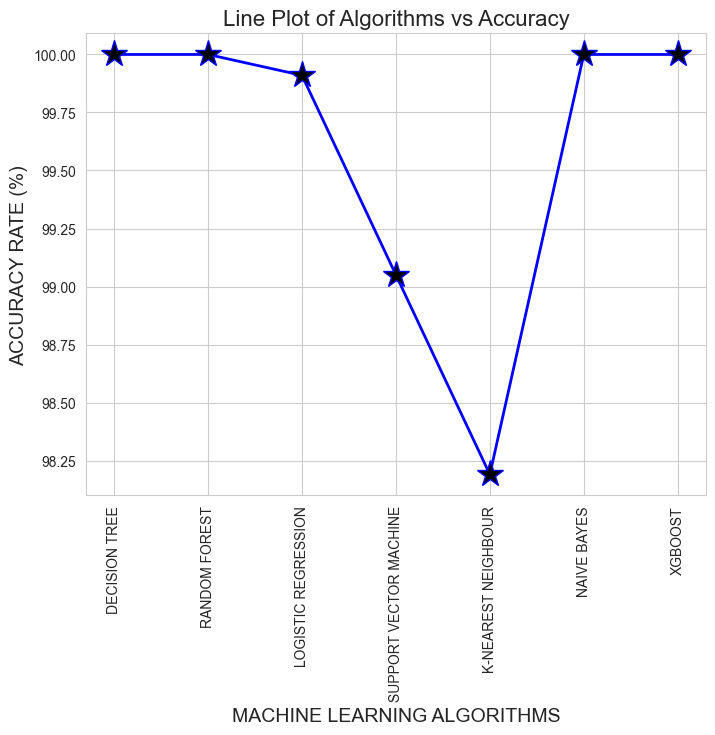

In [56]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.plot(model, accuracy, color='blue', linewidth=2,marker = '*', ms = 20,mfc = 'black')
plt.grid(True)
plt.xlabel('MACHINE LEARNING ALGORITHMS', fontsize=14, fontname='Arial')
plt.ylabel('ACCURACY RATE (%)', fontsize=14, fontname='Arial')
plt.title('Line Plot of Algorithms vs Accuracy', fontsize=16)
plt.xticks(rotation=90)
plt.show()


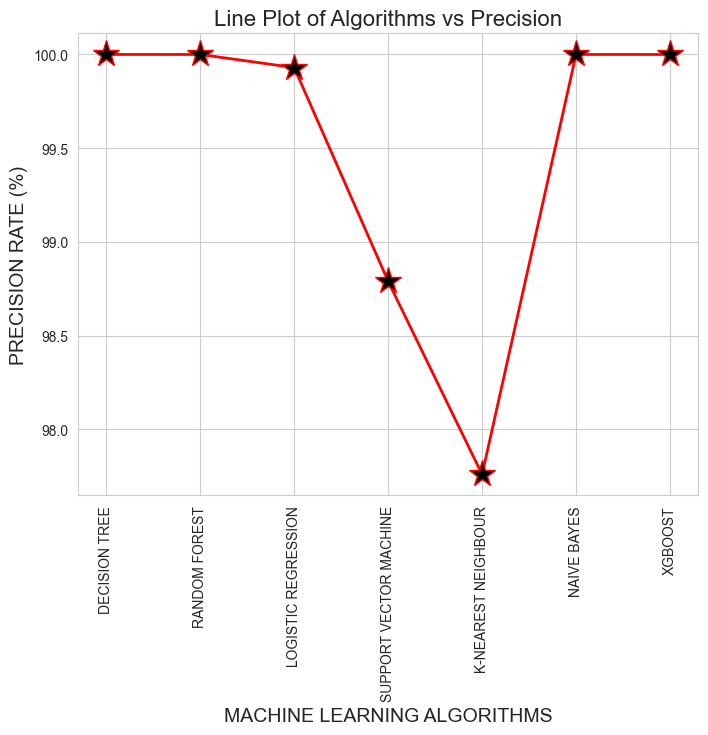

In [57]:
plt.figure(figsize=(8, 6))
ax = sns.set_style('whitegrid')
plt.plot(model,precision, color='r', linewidth=2,marker = '*', ms = 20,mfc = 'black')
plt.xlabel('MACHINE LEARNING ALGORITHMS', fontsize=14)
plt.ylabel('PRECISION RATE (%)', fontsize=14)
plt.title('Line Plot of Algorithms vs Precision', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

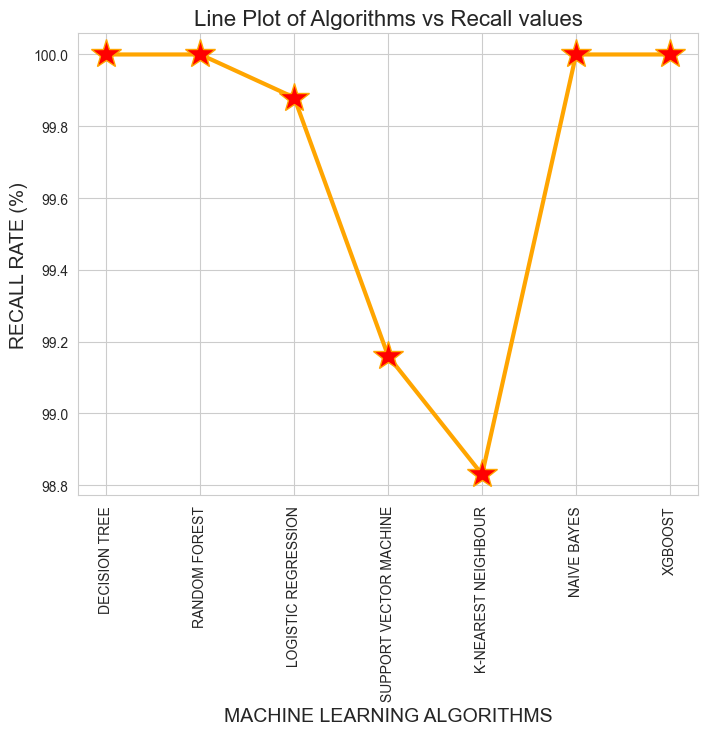

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.set_style('whitegrid')
plt.plot(model,recall, color='orange',linewidth=3,marker = '*', ms = 22,mfc = 'red')
plt.xlabel('MACHINE LEARNING ALGORITHMS', fontsize=14)
plt.ylabel('RECALL RATE (%)', fontsize=14)
plt.title('Line Plot of Algorithms vs Recall values', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

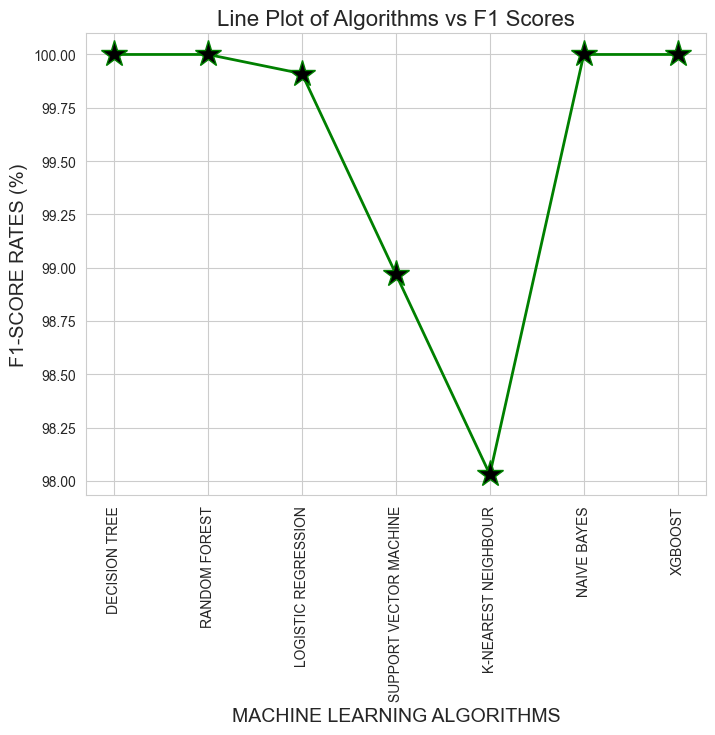

In [59]:
plt.figure(figsize=(8, 6))
ax = sns.set_style('whitegrid')
plt.plot(model,F1, color='green',linewidth=2,marker = '*', ms = 20,mfc = 'black')
plt.xlabel('MACHINE LEARNING ALGORITHMS', fontsize=14)
plt.ylabel('F1-SCORE RATES (%)', fontsize=14)
plt.title('Line Plot of Algorithms vs F1 Scores', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

# FINAL TABLE

In [61]:

# Define the models and their corresponding metrics
models = ["DECISION TREE", "RANDOM FOREST", "LOGISTIC REGRESSION", "SUPPORT VECTOR MACHINE", "K-NEAREST NEIGHBOUR", "NAIVE BAYES", "XGBOOST"]

accuracy_80_20 = [100.00, 100.00, 99.91, 99.05, 98.19, 100.00, 100.00]
precision_80_20 = [100.00, 100.00, 99.93, 98.79, 97.76, 100.00, 100.00]
recall_80_20 = [100.00, 100.00, 99.88, 99.16, 98.83, 100.00, 100.00]
f1_80_20 = [100.00, 100.00, 99.91, 98.97, 98.03, 100.00, 100.00]

accuracy_70_30 = [100.00, 100.00, 100.00, 98.85, 97.70, 100.00, 100.00]
precision_70_30 = [100.00, 100.00, 100.00, 98.66, 97.45, 100.00, 100.00]
recall_70_30 = [100.00, 100.00, 100.00, 98.86, 97.58, 100.00, 100.00]
f1_70_30 = [100.00, 100.00, 100.00, 98.76, 97.52, 100.00, 100.00]

# Create the DataFrame
data = {
    'Model Name': models,
    '70-30 Split': [f'Acc: {acc}, Prec: {prec}, Rec: {rec}, F1: {f1}' for acc, prec, rec, f1 in zip(accuracy_70_30, precision_70_30, recall_70_30, f1_70_30)],
    '80-20 Split': [f'Acc: {acc}, Prec: {prec}, Rec: {rec}, F1: {f1}' for acc, prec, rec, f1 in zip(accuracy_80_20, precision_80_20, recall_80_20, f1_80_20)]
}

df = pd.DataFrame(data)
df


,Model Name,70-30 Split,80-20 Split
0,DECISION TREE,"Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0","Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0"
1,RANDOM FOREST,"Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0","Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0"
2,LOGISTIC REGRESSION,"Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0","Acc: 99.91, Prec: 99.93, Rec: 99.88, F1: 99.91"
3,SUPPORT VECTOR MACHINE,"Acc: 98.85, Prec: 98.66, Rec: 98.86, F1: 98.76","Acc: 99.05, Prec: 98.79, Rec: 99.16, F1: 98.97"
4,K-NEAREST NEIGHBOUR,"Acc: 97.7, Prec: 97.45, Rec: 97.58, F1: 97.52","Acc: 98.19, Prec: 97.76, Rec: 98.83, F1: 98.03"
5,NAIVE BAYES,"Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0","Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0"
6,XGBOOST,"Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0","Acc: 100.0, Prec: 100.0, Rec: 100.0, F1: 100.0"
